In [8]:
import pandas as pd

# Load the dataset
file_path = "ObesityDataSet.csv"
df = pd.read_csv(file_path)

# Tampilkan beberapa baris pertama dan informasi umum
head = df.head()
info = df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

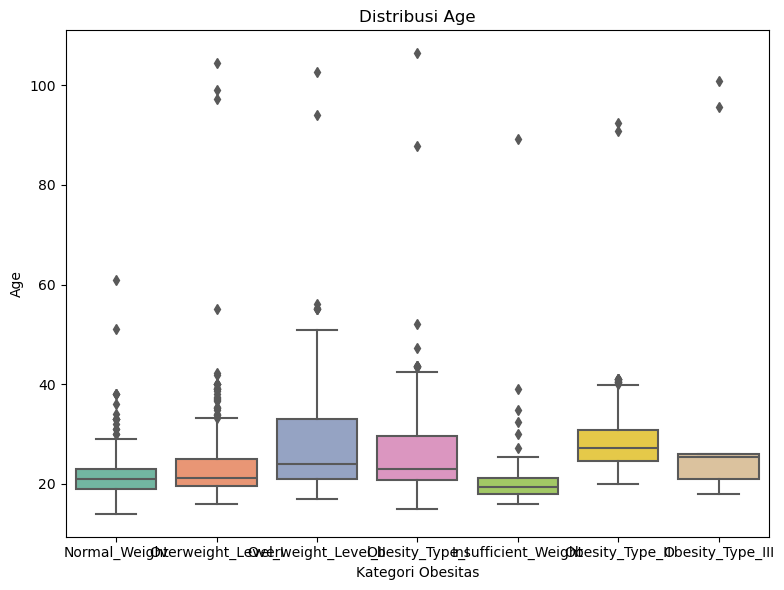

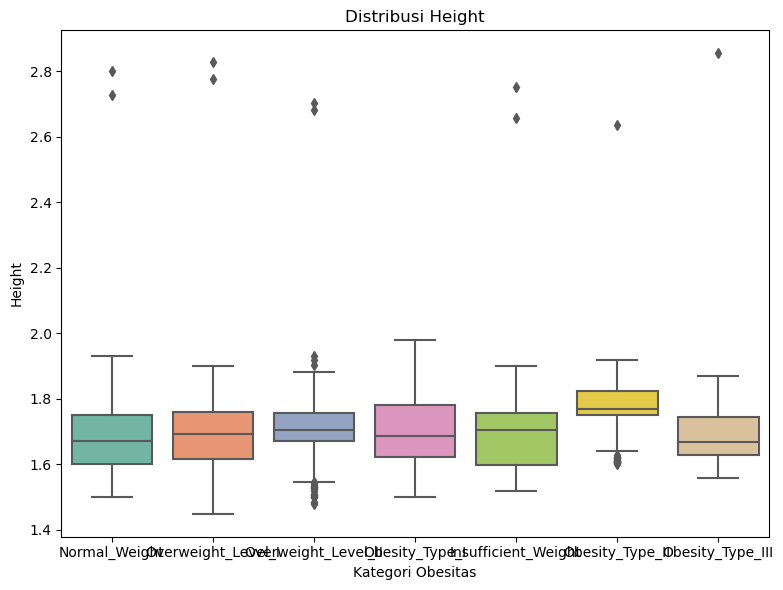

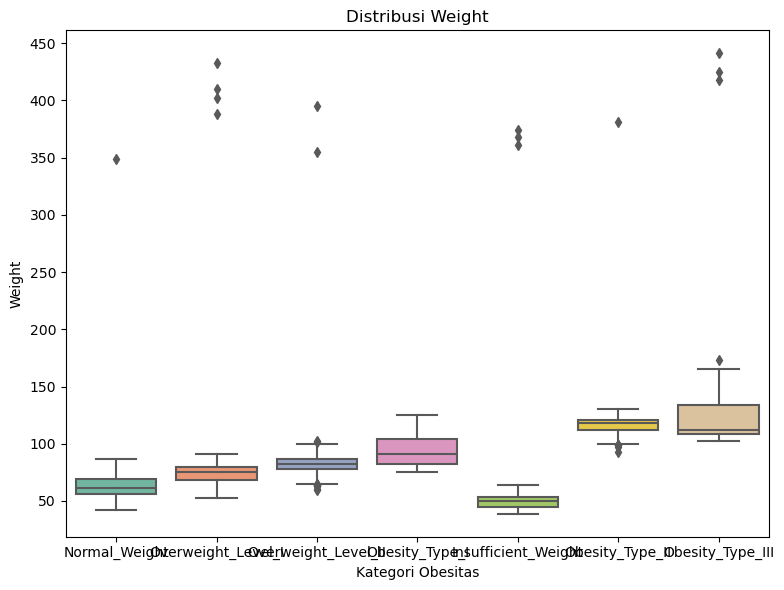

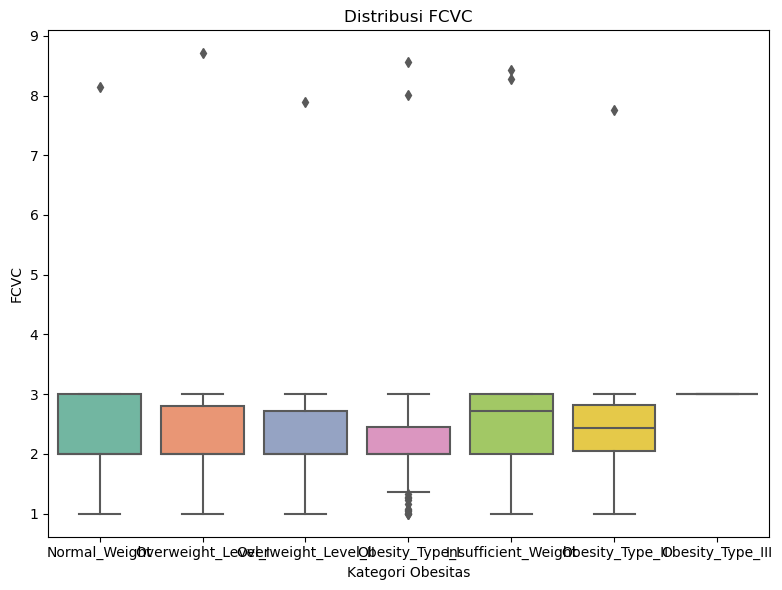

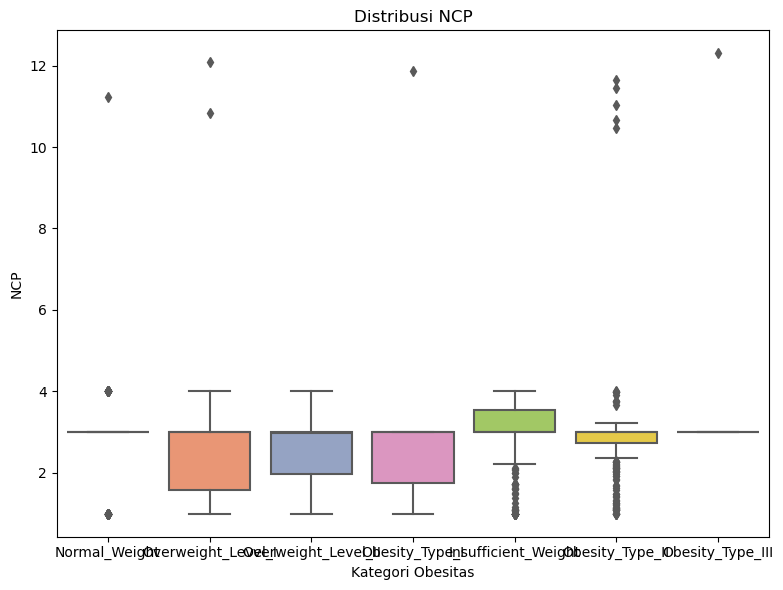

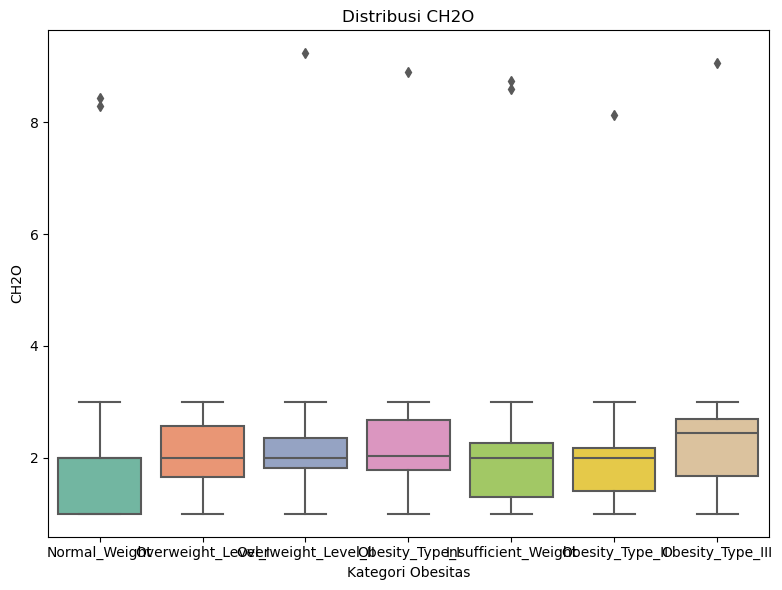

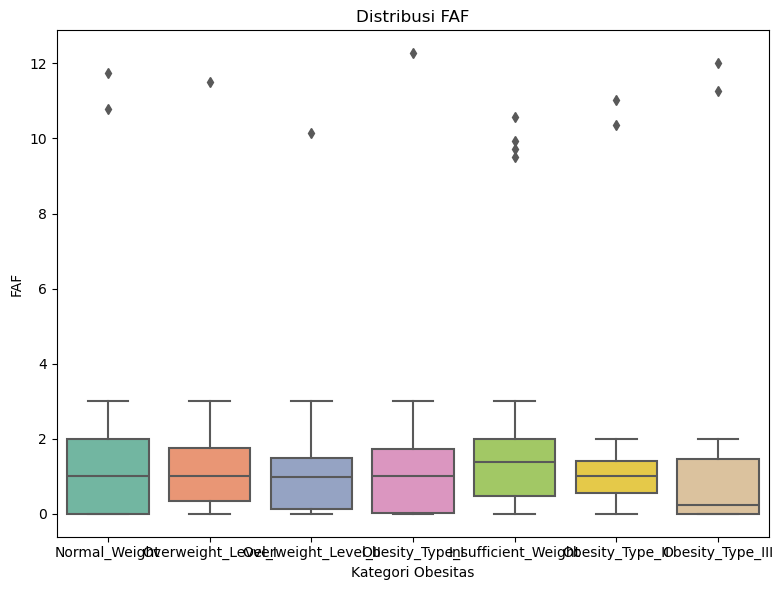

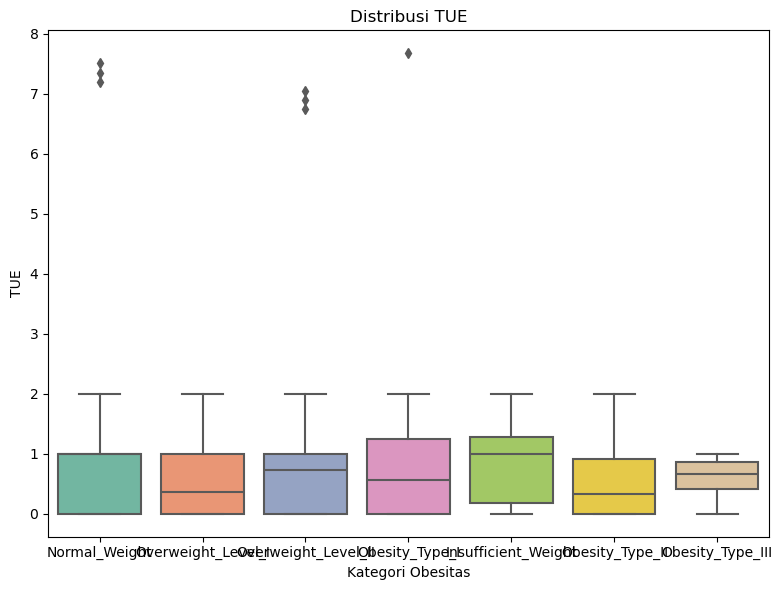

Visualisasi boxplot telah ditampilkan.


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "ObesityDataSet.csv"
df = pd.read_csv(file_path)

# Kolom-kolom numerik yang perlu dikonversi
numerical_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Loop melalui kolom numerik dan coba konversi ke numeric, errors='coerce' akan mengubah nilai yang tidak valid menjadi NaN
for col in numerical_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Setelah konversi, Anda mungkin memiliki missing values (NaN) yang perlu ditangani
# Anda bisa memilih untuk menghapusnya atau melakukan imputasi
df_cleaned = df.dropna(subset=numerical_columns + ['NObeyesdad']) # Hapus baris dengan NaN di kolom numerik atau target

# Sekarang Anda dapat membuat boxplot dengan data yang sudah dikonversi
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='NObeyesdad', y=col, data=df_cleaned, palette='Set2')
    plt.title(f'Distribusi {col}')
    plt.xlabel('Kategori Obesitas')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

print("Visualisasi boxplot telah ditampilkan.")

In [10]:
# Cek jumlah missing values di setiap kolom
missing_values = df.isnull().sum()
print("Jumlah Missing Values per Kolom:\n", missing_values)

Jumlah Missing Values per Kolom:
 Age                               22
Gender                             9
Height                            22
Weight                            19
CALC                               5
FAVC                              11
FCVC                              18
NCP                               22
SCC                               10
SMOKE                              5
CH2O                              15
family_history_with_overweight    13
FAF                               19
TUE                               15
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64


In [11]:
# Cek jumlah unique values di setiap kolom
unique_values = df.nunique()
print("\nJumlah Unique Values per Kolom:\n", unique_values)

# Untuk melihat unique values pada kolom tertentu (misalnya, 'Gender'):
print("\nUnique Values pada Kolom Gender:", df['Gender'].unique())


Jumlah Unique Values per Kolom:
 Age                               1393
Gender                               3
Height                            1561
Weight                            1517
CALC                                 5
FAVC                                 3
FCVC                               807
NCP                                636
SCC                                  3
SMOKE                                3
CH2O                              1262
family_history_with_overweight       3
FAF                               1185
TUE                               1129
CAEC                                 5
MTRANS                               6
NObeyesdad                           7
dtype: int64

Unique Values pada Kolom Gender: ['Female' 'Male' '?' nan]


In [12]:
# Cek jumlah data duplikat
duplicate_count = df.duplicated().sum()
print("\nJumlah Data Duplikat:", duplicate_count)

# Untuk melihat baris-baris yang duplikat:
# df_duplicates = df[df.duplicated(keep=False)] # keep=False menandai semua duplikat
# print("\nBaris Data Duplikat:\n", df_duplicates)


Jumlah Data Duplikat: 18



Distribusi Keseimbangan Data (Kolom NObeyesdad):
 NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


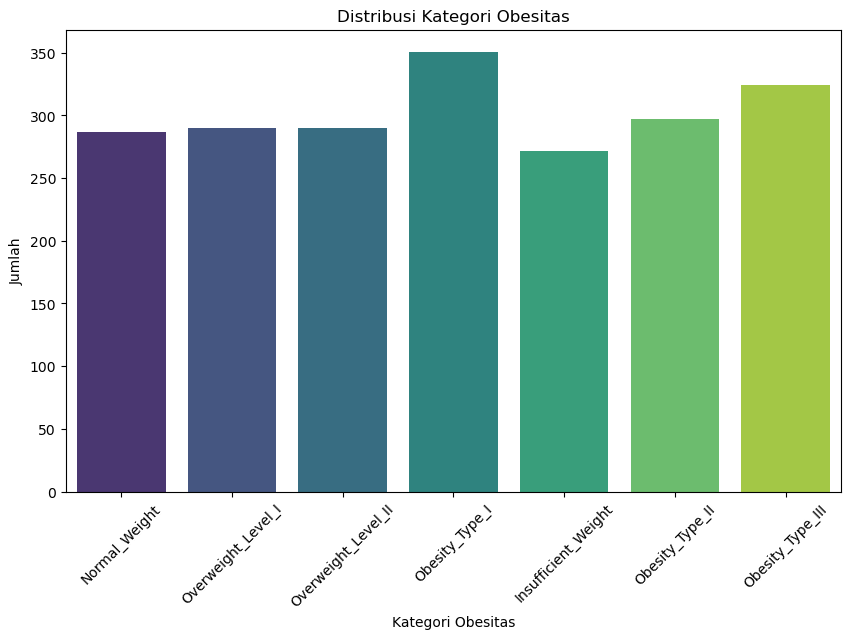

In [13]:
# Cek keseimbangan data pada kolom target 'NObeyesdad'
class_distribution = df['NObeyesdad'].value_counts()
print("\nDistribusi Keseimbangan Data (Kolom NObeyesdad):\n", class_distribution)


plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='NObeyesdad', palette='viridis')
plt.title('Distribusi Kategori Obesitas')
plt.xlabel('Kategori Obesitas')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)  # memiringkan label sumbu X sebesar 45 derajat
plt.show()



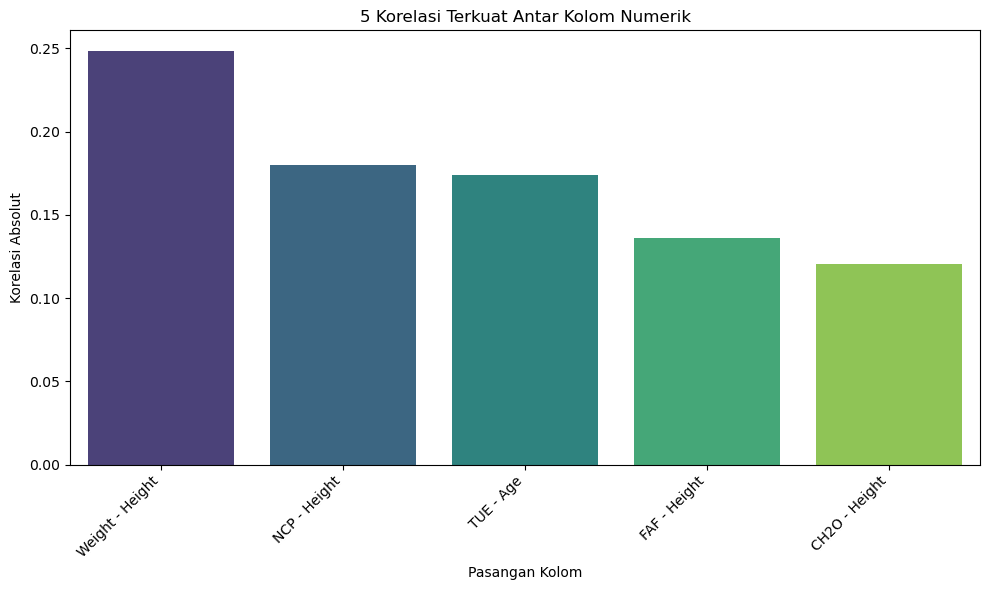

In [14]:
import numpy as np

# Konversi kolom-kolom numerik ke tipe data numerik
for col in numerical_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Hapus baris dengan missing values pada kolom numerik
df_cleaned = df.dropna(subset=numerical_columns)

# Hitung matriks korelasi
correlation_matrix = df_cleaned[numerical_columns].corr()

# Ambil nilai korelasi absolut dan urutkan
abs_corr_matrix = np.abs(correlation_matrix)
upper_triangle = abs_corr_matrix.where(np.triu(np.ones(abs_corr_matrix.shape), k=1).astype(bool))
strong_correlations = upper_triangle.unstack().sort_values(ascending=False)
strong_correlations = strong_correlations.dropna()  # Hapus NaN

# Pilih 5 korelasi teratas
top_5_correlations = strong_correlations.head(5)

# Siapkan data untuk diagram batang
correlation_data = pd.DataFrame({
    'Pair': [f"{pair[0]} - {pair[1]}" for pair in top_5_correlations.index],
    'Correlation': top_5_correlations.values
})

# Visualisasikan dalam diagram batang
plt.figure(figsize=(10, 6))
sns.barplot(x='Pair', y='Correlation', data=correlation_data, palette='viridis')
plt.title('5 Korelasi Terkuat Antar Kolom Numerik')
plt.xlabel('Pasangan Kolom')
plt.ylabel('Korelasi Absolut')
plt.xticks(rotation=45, ha='right')  # Rotasi label sumbu x agar terbaca
plt.tight_layout()  # Untuk mencegah label tumpang tindih
plt.show()

Tipe Data dan Missing Values: Dataset memiliki 17 kolom dan 2111 entri. Semua kolom terdeteksi sebagai tipe data 'object', yang mengindikasikan bahwa semua kolom, termasuk yang seharusnya numerik (seperti Age, Height, dan Weight) Distribusi Data Numerik terhadap Kategori Obesitas:

Age: Distribusi umur bervariasi antar kategori obesitas, dengan beberapa kategori menunjukkan rentang umur yang lebih luas dan beberapa outlier.
Height: Tinggi badan juga menunjukkan variasi antar kategori, dengan beberapa outlier yang cukup tinggi.
Weight: Berat badan menunjukkan perbedaan yang signifikan antar kategori obesitas, di mana kategori obesitas yang lebih tinggi memiliki berat badan yang jauh lebih tinggi.
FCVC, NCP, CH2O, FAF, TUE: Fitur-fitur lain seperti FCVC (konsumsi sayuran), NCP (jumlah makanan utama), CH2O (konsumsi air), FAF (aktivitas fisik), dan TUE (waktu penggunaan perangkat teknologi) juga menunjukkan distribusi yang berbeda antar kategori obesitas, dengan beberapa outlier yang ekstrem.